# Day 2 - Missing Value Handling Strategy & Feature Engineering
``` Preprocessing
Date: 11/04/2025
Goal: 
    - Age Missing Values (~20%): Imputed with the median (with an option for group-based imputation).
    - Deck Missing Values (High Volume): Due to a lack of clear information, candidates for handling include filling with 'Unknown' or dropping the feature entirely.
    - Embarked Missing Values (Minority): Imputed with the mode (the most frequent value).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/titanic_train.csv")
df.head()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(891, 12)

In [2]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [3]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing>0]

Cabin       687
Age         177
Embarked      2
dtype: int64

In [4]:
def preprocess_basic(df):
    df = df.copy()
    # Set 'Title'
    df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')  # Mr, Mrs 추출
    df['Title'] = df['Title'].str.strip()
   
    # Age: fille NaN with median values of groups
    df['Age'] = df.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
    
    # Embarked: fill with values from mode()
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    
    # FamilySize
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    return df

df2 = preprocess_basic(df)
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
FamilySize       0
dtype: int64

In [5]:
# Comparing df and af2
before = df.isnull().sum()
after = df2.isnull().sum()
pd.DataFrame({'before':before,'after':after})

,before,after
Age,177.0,0
Cabin,687.0,687
Embarked,2.0,0
FamilySize,NaN,0
Fare,0.0,0
Name,0.0,0
Parch,0.0,0
PassengerId,0.0,0
Pclass,0.0,0
Sex,0.0,0


# Day 3 - Exploratory Visualization & Correlation Analysis
``` Visualization and Analysis
Date: 11/06/2025
Goal:
    - Visualize key features to understand distribution and survival relationships.
    - Identify potential predictive features based on exploratory charts and correlation patterns.

Key Exploratory Focus Areas:
    - Categorical Variables: Compare survival rates across groups (Sex, Pclass).
    - Numerical Variables: Analyze age and fare distributions and how they relate to survival.
    - Correlation Analysis: Review correlation heatmap to find meaningful numerical relationships relevant for model building.

Expected Insights:
    - Female passengers show significantly higher survival rates compared to males.
    - First–class passengers have the highest survival rate, illustrating socioeconomic influence.
    - Younger passengers (especially children) tend to have better survival chances.

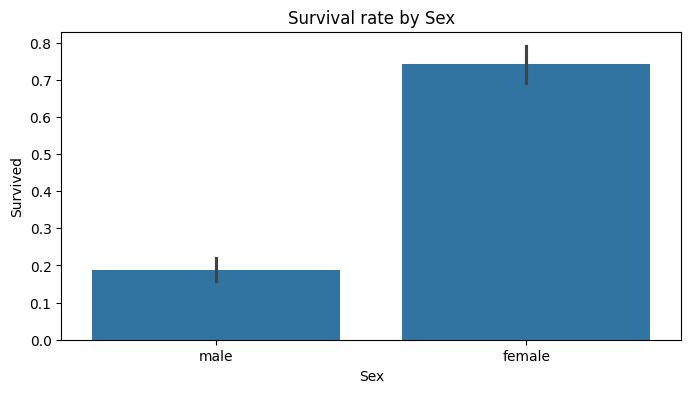

In [6]:
# Survival Rate Visualization by Category
plt.figure(figsize=(8,4))
sns.barplot(x='Sex', y='Survived', data=df2)
plt.title("Survival rate by Sex")
plt.show()

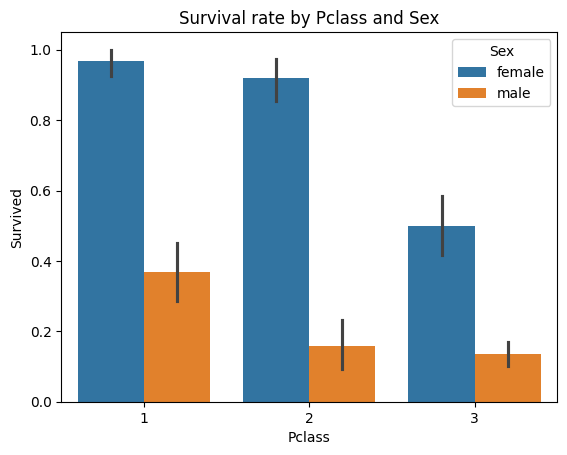

In [7]:
# Survival Rate by Pclass
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df2)
plt.title("Survival rate by Pclass and Sex")
plt.show()

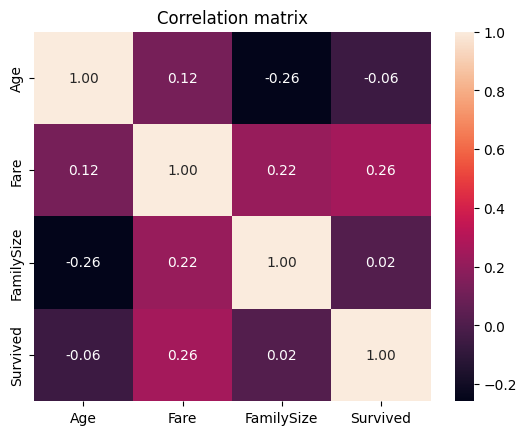

In [8]:
# Age Distribution and Survival Rate
numeric_cols = ['Age','Fare','FamilySize']
sns.heatmap(df2[['Age','Fare','FamilySize','Survived']].corr(), annot=True, fmt=".2f")
plt.title("Correlation matrix")
plt.show()

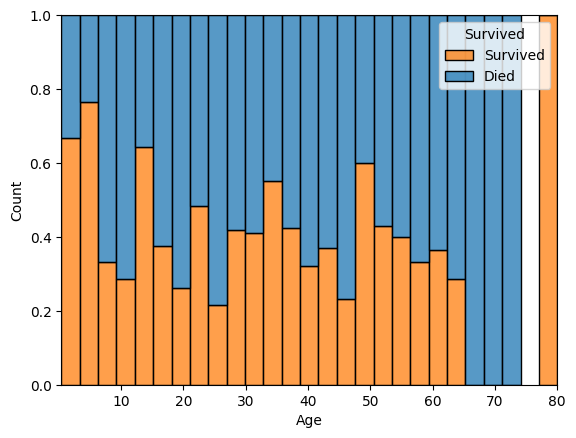

In [9]:
sns.histplot(data=df2, x="Age", hue="Survived", multiple="fill")
plt.legend(title='Survived', labels=['Survived', 'Died'], loc='upper right')

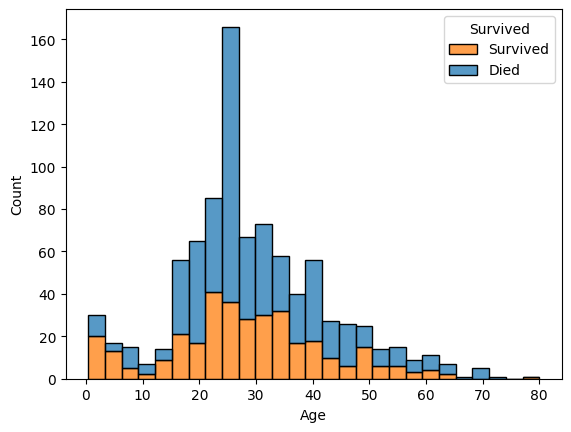

In [10]:
sns.histplot(data=df2, x="Age", hue="Survived", multiple="stack")
plt.legend(title='Survived', labels=['Survived', 'Died'], loc='upper right')

### Key Insights from EDA
1. Female passengers show a significantly higher survival rate than males (around 74% vs 19%), guessing it's becuase of a strong "women and children first" effect.

2. First-class passengers have the highest survival rate, indicating social class likely influenced rescue priority.

3. Age is strongly associated with survival, with the youngest group (children) having the highest survival rate, while the 20-40 age range saw high fatality rates, though a resurgence in survival was observed among some middle-aged passengers (early 50s).

# Day 4 - Numeric/Categorical statistics and simple comparisons (group statistics, percentage tables)
``` Visualization and Analysis
Date: 11/07/2025
Goal: Summarize precise figures (counts and percentages) for each group (such as Gender, Pclass, Title, etc.)

Key Exploratory Focus Areas:
    - Compare survival rate differences between males and females
    - Analyze survival rates and passenger counts by the combination of passenger class (Pclass) and gender (Sex)
    - Compare survival rates based on titles (Mrs, Miss, Master, etc.) extracted from passenger names

In [13]:
# Survivers based on gender
sex_table = df2.groupby('Sex')['Survived'].agg(['count','sum'])
sex_table['Survival_rate'] = sex_table['sum'] / sex_table['count']
sex_table

,count,sum,Survival_rate
Sex,,,
female,314,233,0.742038
male,577,109,0.188908


In [15]:
# Pclass by Sex Crosstabulation (Pivot Table)
pivot = pd.pivot_table(df2, index='Pclass', columns='Sex', values='Survived', aggfunc=['mean','count'])
pivot

mean            count     
Sex       female      male female male
Pclass                                
1       0.968085  0.368852     94  122
2       0.921053  0.157407     76  108
3       0.500000  0.135447    144  347

In [21]:
title_table = df2.groupby('Title')['Survived'].agg(['count','mean']).sort_values(by='mean', ascending=False)
title_table

,count,mean
Title,,
Lady,1,1.000000
Ms,1,1.000000
Sir,1,1.000000
Mme,1,1.000000
the Countess,1,1.000000
Mlle,2,1.000000
Mrs,125,0.792000
Miss,182,0.697802
Master,40,0.575000


In [39]:
# Survivers based on passender class
pclass_table = df2.groupby('Pclass')['Survived'].agg(['count','sum'])
pclass_table['Survival_rate'] = pclass_table['sum'] / pclass_table['count']
pclass_table

,count,sum,Survival_rate
Pclass,,,
1,216,136,0.629630
2,184,87,0.472826
3,491,119,0.242363


In [45]:
survive_rate = df['Survived'].mean() * 100
survive_rate.round(2)

np.float64(38.38)

### Key Insights from EDA
``` EDA
    - Overall survival rate: 38.38%
    - Female survival rate: 74.2% vs Male: 18.9% — There is a significant difference in survival rates between genders.
    - Pclass=1 survival: 63.0% vs Pclass=2 suvival: 47.3 vs Pclass=3: 24.2% — There is a significant difference in survival rates based on passenger class.